In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from src.crime_preprocessing import *

In [6]:
# load cleaned data
cleaned_df = pd.read_csv(
    f"data/cleaned_crimes_{datetime.now().strftime('%Y%m%d')}.csv",
    nrows=10000,  # Adjust based on your available memory
)
print("Data loaded successfully")

Data loaded successfully


In [7]:
# For classification, you might want to predict 'Arrest'
ml_data = prepare_for_ml(cleaned_df, target_column="Arrest")

# Print some information about ML-ready data
if "X_train" in ml_data:
    print(f"\nMachine Learning Data:")
    print(f"Training set shape: {ml_data['X_train'].shape}")
    print(f"Testing set shape: {ml_data['X_test'].shape}")

    # Class balance in target variable
    print(f"\nClass distribution in training set:")
    print(ml_data["y_train"].value_counts(normalize=True))

Preparing data for machine learning...
Data is ready for machine learning!

Machine Learning Data:
Training set shape: (8000, 21463)
Testing set shape: (2000, 21463)

Class distribution in training set:
Arrest
False    0.86525
True     0.13475
Name: proportion, dtype: float64


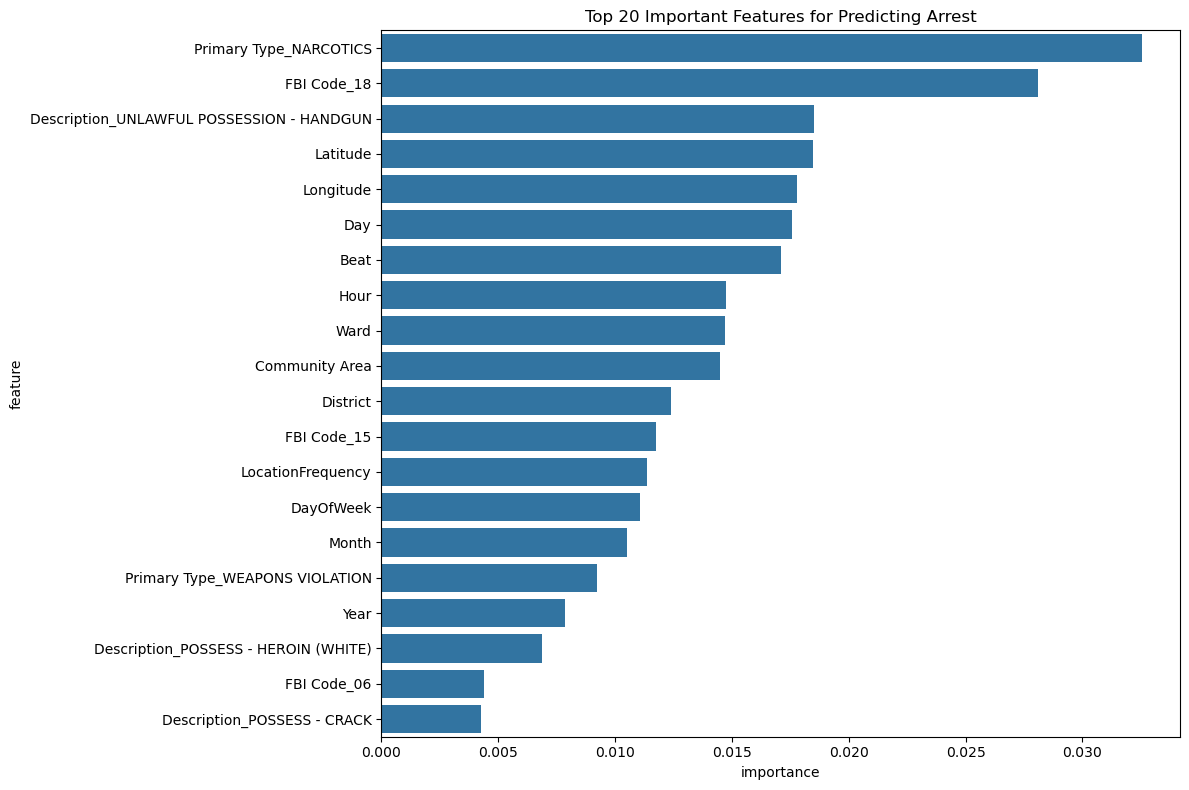

In [8]:
from sklearn.ensemble import RandomForestClassifier

if "X_train" in ml_data and "y_train" in ml_data:
    # Train a simple model to get feature importance
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(ml_data["X_train"], ml_data["y_train"])

    # Get feature importance
    feature_importance = pd.DataFrame(
        {
            "feature": ml_data["X_train"].columns,
            "importance": model.feature_importances_,
        }
    ).sort_values("importance", ascending=False)

    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x="importance", y="feature", data=feature_importance.head(20))
    plt.title("Top 20 Important Features for Predicting Arrest")
    plt.tight_layout()
    plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.95      1727
        True       0.88      0.33      0.48       273

    accuracy                           0.90      2000
   macro avg       0.89      0.66      0.71      2000
weighted avg       0.90      0.90      0.88      2000



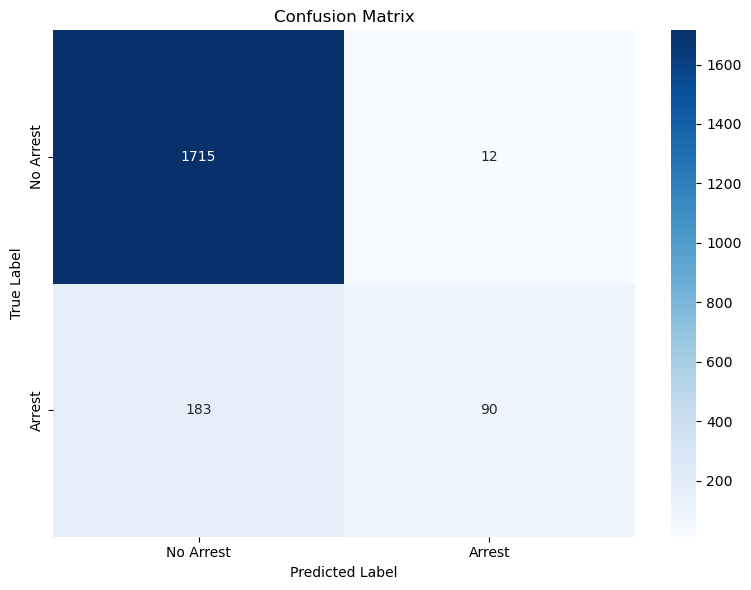

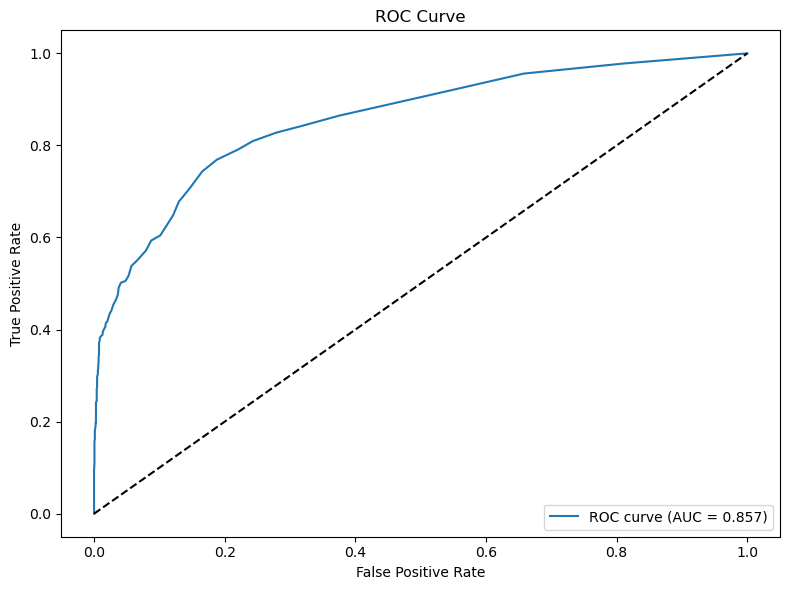

In [9]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

if "X_train" in ml_data and "y_train" in ml_data:
    # Predict on test set
    y_pred = model.predict(ml_data["X_test"])
    y_prob = model.predict_proba(ml_data["X_test"])[:, 1]

    # Print classification report
    print("Classification Report:")
    print(classification_report(ml_data["y_test"], y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(ml_data["y_test"], y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["No Arrest", "Arrest"],
        yticklabels=["No Arrest", "Arrest"],
    )
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(ml_data["y_test"], y_prob)
    auc = roc_auc_score(ml_data["y_test"], y_prob)
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

In [10]:
import pickle

if "X_train" in ml_data:
    # Save model
    with open("./data/crime_classifier_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # Save scaler and feature info for preprocessing new data
    with open("./data/crime_ml_preprocessor.pkl", "wb") as f:
        pickle.dump(
            {"scaler": ml_data["scaler"], "feature_names": ml_data["feature_names"]}, f
        )

    print("Model and preprocessor saved successfully!")

Model and preprocessor saved successfully!
